In [1]:
import yfinance as yf

In [2]:
google = yf.download(tickers='GOOG',
                     start='2016-01-04',
                     end='2016-12-31',
                     progress=False)

google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,743.000000,744.059998,731.257996,741.840027,741.840027,3272800
2016-01-05,746.450012,752.000000,738.640015,742.580017,742.580017,1950700
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000
2016-01-07,730.309998,738.500000,719.059998,726.390015,726.390015,2963700
2016-01-08,731.450012,733.229980,713.000000,714.469971,714.469971,2450900


In [3]:
# Checking for NULL value
google['Open'].isnull().sum()

0

In [4]:
Google = google['Open']
Google.head()

Date
2016-01-04    743.000000
2016-01-05    746.450012
2016-01-06    730.000000
2016-01-07    730.309998
2016-01-08    731.450012
Name: Open, dtype: float64

In [5]:
# Importing required modules
import pandas as pd
import numpy as np

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# setting charts size and style
plt.rcParams['figure.figsize'] = (15, 4)
plt.style.use('fivethirtyeight')

In [6]:
stock_data = pd.read_csv("stock_data.csv", parse_dates = True, index_col = ['Date'] )
stock_data = stock_data.drop('Facebook', axis = 1)
stock_data.head()

,Amazon
Date,
2016-01-04,636.989990
2016-01-05,633.789978
2016-01-06,632.650024
2016-01-07,607.940002
2016-01-08,607.049988


In [7]:
new_stock_data = pd.concat([stock_data,Google], axis= 1)
new_stock_data.head()

,Amazon,Open
Date,,
2016-01-04,636.989990,743.000000
2016-01-05,633.789978,746.450012
2016-01-06,632.650024,730.000000
2016-01-07,607.940002,730.309998
2016-01-08,607.049988,731.450012


In [8]:
new_stock_data = new_stock_data.rename(columns={'Open':'Google'})
new_stock_data.head()

,Amazon,Google
Date,,
2016-01-04,636.989990,743.000000
2016-01-05,633.789978,746.450012
2016-01-06,632.650024,730.000000
2016-01-07,607.940002,730.309998
2016-01-08,607.049988,731.450012


In [9]:
SP_data = pd.read_csv("benchmark_data.csv", parse_dates = True, index_col = ['Date'] )
SP_data = SP_data.dropna()
SP_data.shape

(252, 1)

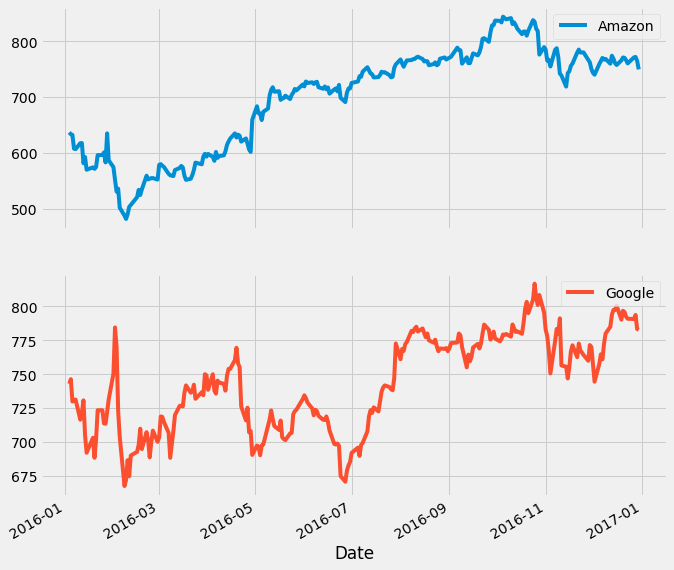

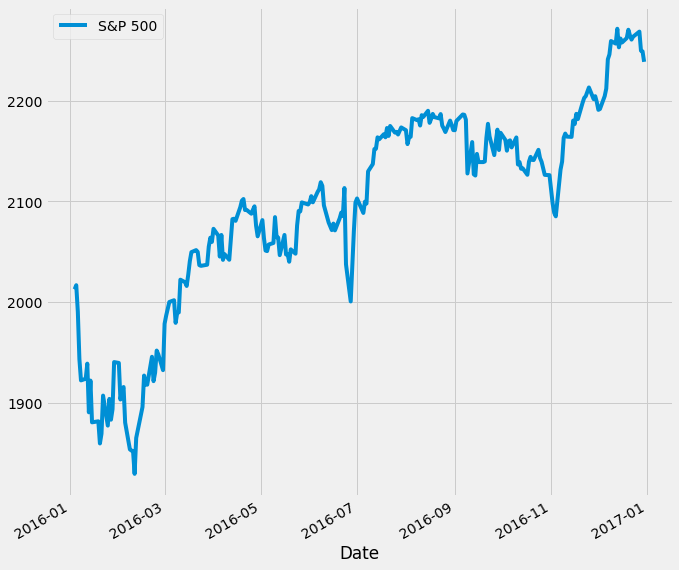

In [10]:
plt.rcParams['figure.figsize'] = (10,10)
new_stock_data.plot(subplots=True )
SP_data.plot()
plt.show()

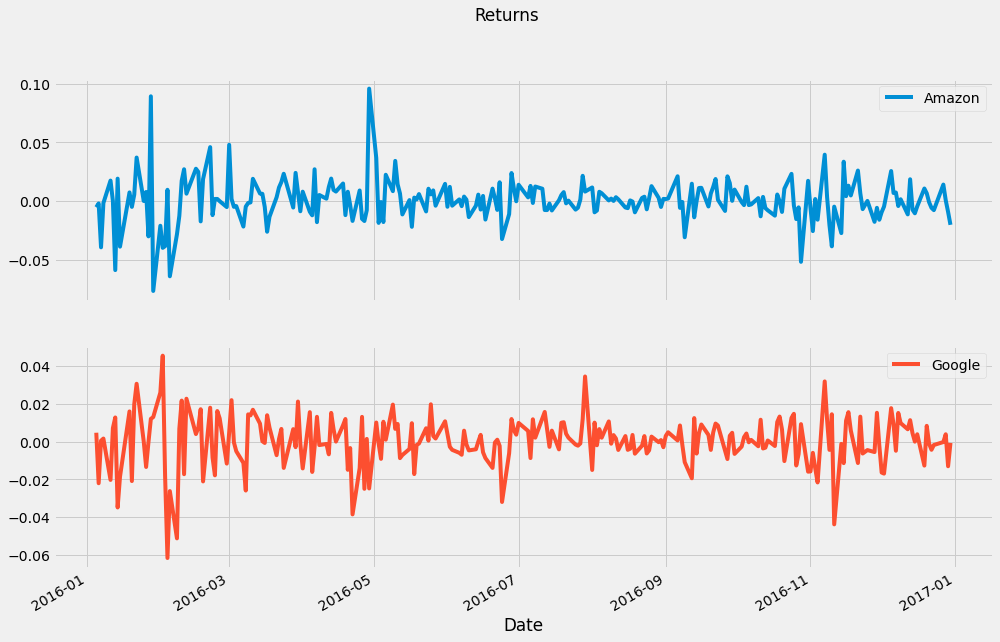

,Amazon,Google
count,251.000000,251.000000
mean,0.000818,0.000295
std,0.018383,0.013195
min,-0.076100,-0.061554
25%,-0.007211,-0.005631
50%,0.000857,0.000550
75%,0.009224,0.009220
max,0.095664,0.045359


In [11]:
## daily return
stock_return = new_stock_data.pct_change()
plt.rcParams['figure.figsize'] = (15,10)
stock_return.plot(subplots= True, title = "Returns")
plt.show()
stock_return.describe()

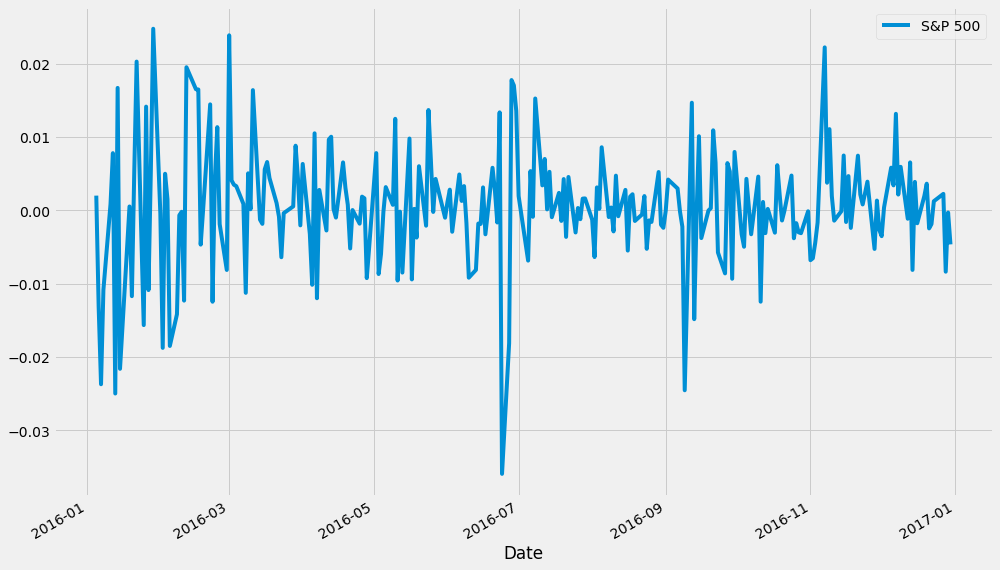

,S&P 500
count,251.000000
mean,0.000458
std,0.008205
min,-0.035920
25%,-0.002949
50%,0.000205
75%,0.004497
max,0.024760


In [12]:
SP_return = SP_data.pct_change()
plt.rcParams['figure.figsize'] = (15,10)
SP_return.plot()
plt.show()
SP_return.describe()

In [15]:
# Excess return

excess_returns = stock_return.sub(SP_return['S&P 500'], axis = 0)
excess_returns.describe()


,Amazon,Google
count,251.000000,251.000000
mean,0.000360,-0.000163
std,0.016126,0.013771
min,-0.100860,-0.063081
25%,-0.006229,-0.007436
50%,0.000698,0.000906
75%,0.007351,0.007796
max,0.100728,0.064102


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B5FAF76250>,
      dtype=object)

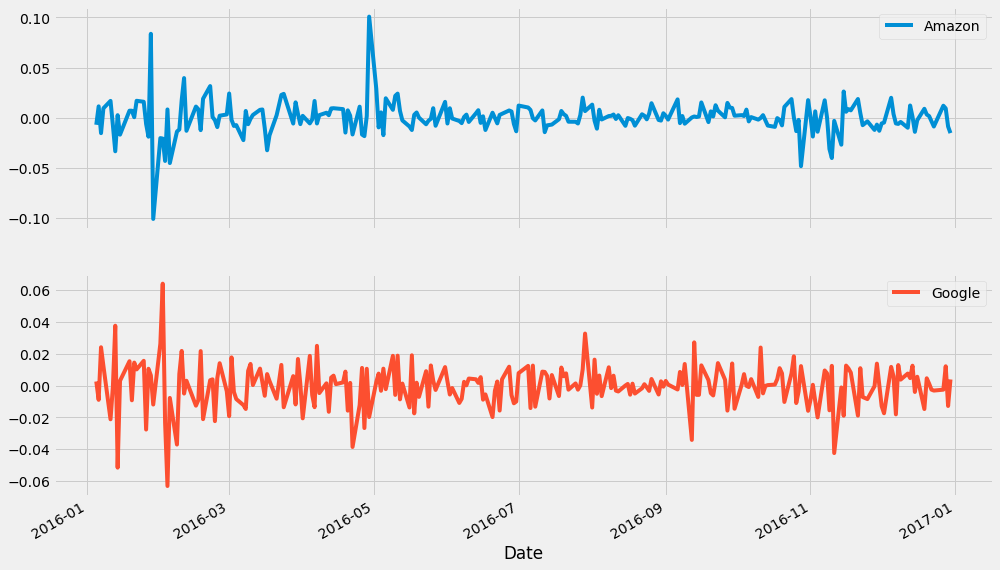

In [16]:
excess_returns.plot(subplots=True)

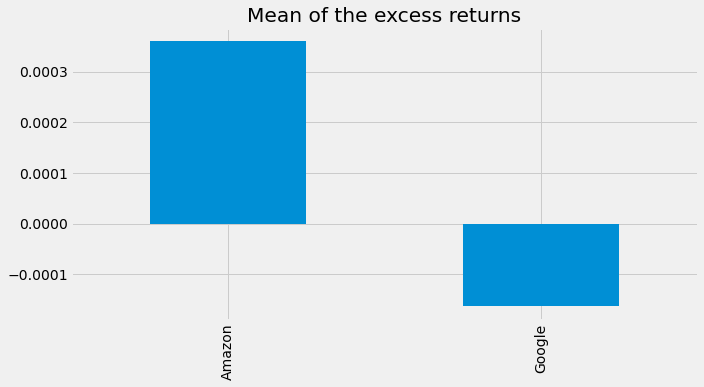

In [21]:
## Calculating the mean of the excess daily excess returns

avg_excess_return = excess_returns.mean()
plt.rcParams['figure.figsize'] = (10,5)
avg_excess_return.plot.bar(title = "Mean of the excess returns")
plt.show()

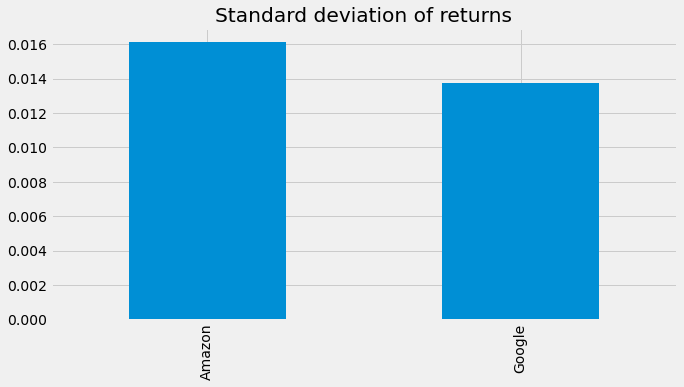

In [22]:
## Calculating standard deviation of the excess returns

std_excess_return = excess_returns.std()
std_excess_return.plot.bar(title="Standard deviation of returns")
plt.show()

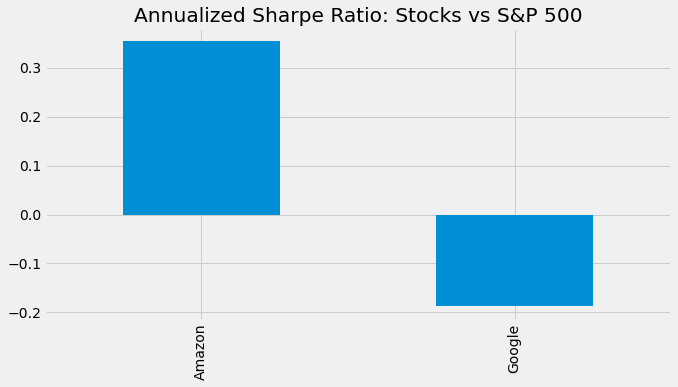

In [23]:
daily_sharpe_ratio = avg_excess_return.div(std_excess_return)


annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)


annual_sharpe_ratio.plot.bar(title = 'Annualized Sharpe Ratio: Stocks vs S&P 500')
plt.show()

#### Investment in Amazon is advisable rather than in Google.